In [1]:
import pandas as pd
import numpy as np

# 데이터 전처리

In [2]:
# 데이터 불러오기
df = pd.read_csv('/Users/chan/Documents/공모전/월별_매출_data.csv')
df

,년,월,ATC,업체명,제품,제조사,판매금액,판매수량
0,2016년,1월,[A11] 비타민,경남제약,경남데일리디츄어블정,경남제약,3.368375e+07,2895.1
1,2016년,1월,[A11] 비타민,경남제약,경남비타민씨정,경남제약,1.377390e+08,7346.3
2,2016년,1월,[A11] 비타민,경남제약,경남씨플러스정,경남제약,1.445235e+07,406.9
3,2016년,1월,[A11] 비타민,경남제약,레모나씨플러스정,경남제약,1.779869e+07,367.9
4,2016년,1월,[A11] 비타민,경남제약,쎄토마연질캡슐,경남제약,2.541853e+07,1160.9
...,...,...,...,...,...,...,...,...
30369,2022년,2월,[A11] 비타민,한풍제약,파워비타비백정,한풍제약,1.992963e+07,334.0
30370,2022년,2월,[A11] 비타민,한풍제약,파워액티브정,한풍제약,1.143703e+06,38.0
30371,2022년,2월,[A11] 비타민,헤파가드,비타포유정,헤파가드,4.558930e+05,60.0
30372,2022년,2월,[A11] 비타민,현대약품,벤포액티브연질캡슐,현대약품,2.061129e+06,23.0


In [3]:
# 제품명 순서대로 정렬, 이후 년도 기준(월 기준)으로 재정렬
df = df.sort_values(['제품', '년'])

# ATC. 업체명, 제조사 제거 및 index 초기화
df1 = df[['년','월', '제품','판매금액', '판매수량']]
df1 = df1.reset_index()
df1 = df1[['년','월', '제품','판매금액', '판매수량']]
df1

,년,월,제품,판매금액,판매수량
0,2019년,8월,가나폴로연질캡슐,2.554002e+04,50.7
1,2019년,9월,가나폴로연질캡슐,2.554646e+04,50.7
2,2019년,11월,가나폴로연질캡슐,2.314663e+04,46.8
3,2016년,1월,감마마그빅연질캡슐,1.261204e+07,421.2
4,2016년,2월,감마마그빅연질캡슐,3.371061e+07,705.9
...,...,...,...,...,...
30369,2021년,7월,힙스브이파워정,1.527350e+06,22.0
30370,2021년,8월,힙스브이파워정,2.343920e+06,44.0
30371,2021년,9월,힙스브이파워정,7.364260e+05,21.0
30372,2021년,10월,힙스브이파워정,2.104997e+06,64.0


In [4]:
# 년 / 월 합치고, month 열로 만들기
df1['month'] = df1['년'] + df1['월']
df1 = df1[['month', '제품', '판매금액' , '판매수량']]

# 년/월 제거하고 pd 활용해서 datetime 형식으로 data 변경
df1['month'] = df1['month'].str.replace('년', '-')
df1['month'] = df1['month'].str.replace('월', '')
df1['month'] = pd.to_datetime(df1['month'])

/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_52473/120734115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['month'].str.replace('년', '-')
/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_52473/120734115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['month'].str.replace('월', '')
/var/folders/42/6b83dcy962qg0qxnnz4ck_8c0000gn/T/ipykernel_52473/120734115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [5]:
df1

,month,제품,판매금액,판매수량
0,2019-08-01,가나폴로연질캡슐,2.554002e+04,50.7
1,2019-09-01,가나폴로연질캡슐,2.554646e+04,50.7
2,2019-11-01,가나폴로연질캡슐,2.314663e+04,46.8
3,2016-01-01,감마마그빅연질캡슐,1.261204e+07,421.2
4,2016-02-01,감마마그빅연질캡슐,3.371061e+07,705.9
...,...,...,...,...
30369,2021-07-01,힙스브이파워정,1.527350e+06,22.0
30370,2021-08-01,힙스브이파워정,2.343920e+06,44.0
30371,2021-09-01,힙스브이파워정,7.364260e+05,21.0
30372,2021-10-01,힙스브이파워정,2.104997e+06,64.0


# 특정 제품군 입력(아로나민, 비맥스 등 제품군이 공통적으로 가진 이름 입력)

In [37]:
# '아로나민'이 들어간 제품만 추출
df2 = df1[df1['제품'].str.contains('엑세라민')]

In [38]:
df2

,month,제품,판매금액,판매수량
18458,2016-01-01,엑세라민비정,1.905054e+09,132525.9
18459,2016-02-01,엑세라민비정,2.294963e+09,183341.6
18460,2016-03-01,엑세라민비정,2.772897e+09,227428.5
18461,2016-04-01,엑세라민비정,2.191446e+09,239571.8
18462,2016-05-01,엑세라민비정,2.135253e+09,206935.3
...,...,...,...,...
18716,2021-10-01,엑세라민프로정,4.885421e+08,9837.0
18717,2021-11-01,엑세라민프로정,4.894813e+08,11164.0
18718,2021-12-01,엑세라민프로정,5.240153e+08,11721.0
18719,2022-01-01,엑세라민프로정,4.495913e+08,9142.0


In [8]:
total = pd.DataFrame(df2.groupby('month').sum())
total = total.reset_index()

In [9]:
all_total = pd.DataFrame(df1.groupby('month').sum())
all_total = all_total.reset_index()

In [39]:
# 보유 제품 목록 확인
df2['제품'].unique()

array(['엑세라민비정', '엑세라민에이스정', '엑세라민엑소정', '엑세라민정', '엑세라민프로정'], dtype=object)

# 특정 제품 검색(아로나민골드정, 아로나민골드프리미엄정 등 구체적인 제품명 입력)

In [13]:
# 원하는 특정 제품만 이름 넣어서 추출
df3 = df2.loc[df2['제품'] == '아로나민골드정']
df4 = df2.loc[df2['제품'] == '아로나민골드프리미엄정']

In [35]:
df5 = df2.loc[df2['제품'] == '비맥스메타정']
df6 = df2.loc[df2['제품'] == '비맥스메타정']

In [90]:
df7 = df2.loc[df2['제품'] == '엑세라민비정']
df8 = df2.loc[df2['제품'] == '임팩타민프리미엄정']

In [74]:
df7 = df1[df1['제품'].str.contains('엑세라민')]



In [81]:
df5

,month,제품,판매금액,판매수량
10720,2019-04-01,비맥스메타정,5.518842e+07,1111.5
10721,2019-05-01,비맥스메타정,1.132470e+09,32376.5
10722,2019-06-01,비맥스메타정,1.533478e+09,43647.5
10723,2019-07-01,비맥스메타정,1.826944e+09,52026.0
10724,2019-08-01,비맥스메타정,2.328554e+09,66094.6
10725,2019-09-01,비맥스메타정,2.675797e+09,75894.0
10726,2019-10-01,비맥스메타정,3.134756e+09,89099.4
10727,2019-11-01,비맥스메타정,3.180537e+09,91183.3
10728,2019-12-01,비맥스메타정,3.265003e+09,93490.8
10729,2020-01-01,비맥스메타정,3.330756e+09,96101.2


In [75]:
df7 = df7.groupby('month').sum()

In [85]:
df7.reset_index(drop=False, inplace=True)

In [86]:
df7

,month,판매금액,판매수량
0,2016-01-01,1.905054e+09,132525.9
1,2016-02-01,2.297145e+09,183414.4
2,2016-03-01,2.900328e+09,229838.7
3,2016-04-01,3.104666e+09,257848.5
4,2016-05-01,3.199953e+09,228792.2
...,...,...,...
69,2021-10-01,1.451707e+09,97186.0
70,2021-11-01,1.487931e+09,103916.0
71,2021-12-01,1.550401e+09,92461.0
72,2022-01-01,1.372962e+09,77194.0


# 시각화

In [87]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothicOTF') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothicOTF']


In [88]:
import matplotlib.pyplot as plt
#matplotlib 패키지 한글 깨짐 처리 시작
# plt.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

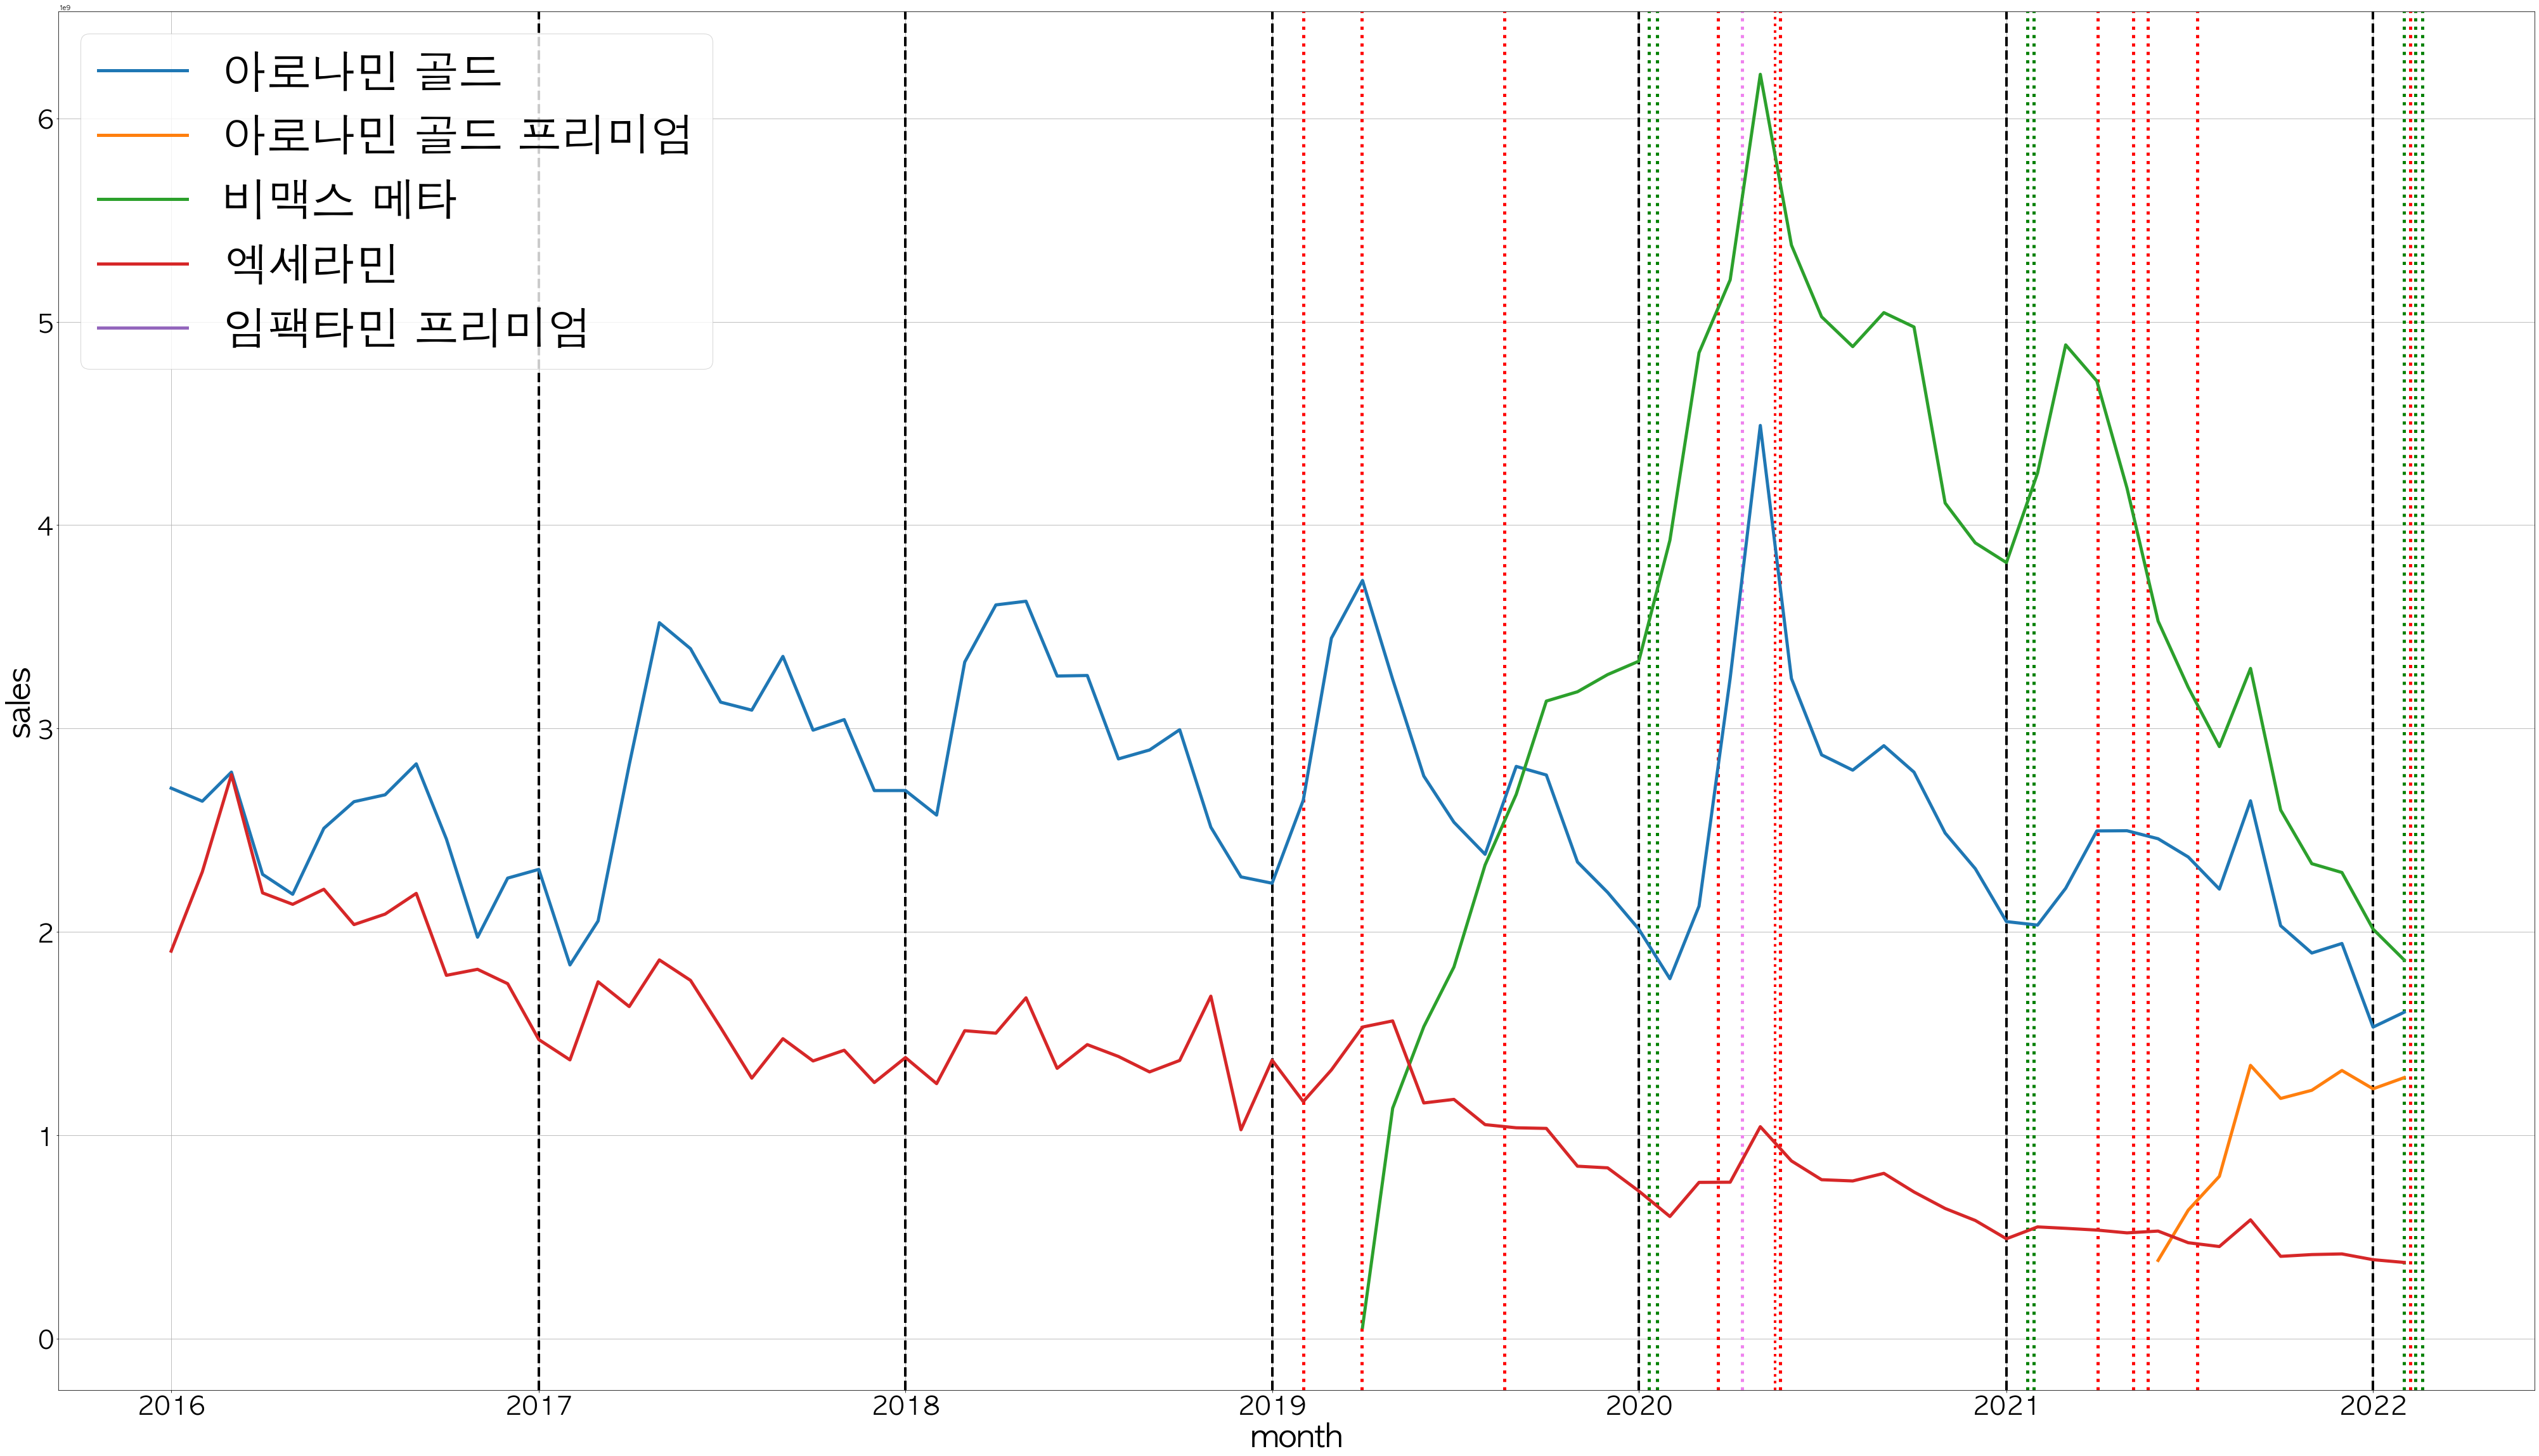

In [91]:
%matplotlib inline 
import matplotlib.pyplot as plt
x = df3['month']
y = df3['판매금액']

x1 = df4['month']
y1 = df4['판매금액']

x2 = df5['month']
y2 = df5['판매금액']

x3 = total['month']
y3 = total['판매금액']

x4 = all_total['month']
y4 = all_total['판매금액']

x5 = df7['month']
y5 = df7['판매금액']

x6 = df8['month']
y6 = df8['판매금액']



plt.figure(figsize= (70, 40))
plt.xlabel('month', fontsize=50)
plt.ylabel('sales', fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# 연간 기준선
plt.axvline(x=pd.to_datetime('2017-01-01'), color='k', linestyle='--', linewidth=4)
plt.axvline(x=pd.to_datetime('2018-01-01'), color='k', linestyle='--', linewidth=4)
plt.axvline(x=pd.to_datetime('2019-01-01'), color='k', linestyle='--', linewidth=4)
plt.axvline(x=pd.to_datetime('2020-01-01'), color='k', linestyle='--', linewidth=4)
plt.axvline(x=pd.to_datetime('2021-01-01'), color='k', linestyle='--', linewidth=4)
plt.axvline(x=pd.to_datetime('2022-01-01'), color='k', linestyle='--', linewidth=4)

### 자사광고
# 아로나민 골드 광고
plt.axvline(x=pd.to_datetime('2019-02-01'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2019-03-31'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2019-08-20'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2020-03-20'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2020-05-21'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2021-04-02'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2021-05-07'), color='r', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2021-05-22'), color='r', linestyle=':', linewidth=5)
#plt.axvline(x=pd.to_datetime('2021-07-09'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2021-07-10'), color='r', linestyle=':', linewidth=5)
#plt.axvline(x=pd.to_datetime('2021-07-11'), color='r', linestyle=':', linewidth=3)
plt.axvline(x=pd.to_datetime('2022-02-07'), color='r', linestyle=':', linewidth=5)


# 아로나민 씨플러스
plt.axvline(x=pd.to_datetime('2020-05-16'), color='r', linestyle=':', linewidth=4)


### 경쟁사 광고
# GC녹십자 비맥스메타정
plt.axvline(x=pd.to_datetime('2020-01-11'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2020-01-19'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2021-01-22'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2021-01-28'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2022-02-01'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2022-02-12'), color='g', linestyle=':', linewidth=5)
plt.axvline(x=pd.to_datetime('2022-02-19'), color='g', linestyle=':', linewidth=5)


# 글락소 스미스 클라인 센트룸
plt.axvline(x=pd.to_datetime('2020-04-13'), color='violet', linestyle=':', linewidth=5)


# plt.grid(linestyle=':')
plt.plot(x, y, linewidth=5, label='아로나민 골드')
plt.plot(x1, y1, linewidth=5, label ='아로나민 골드 프리미엄')
plt.plot(x2, y2, linewidth=5, label= '비맥스 메타')
# plt.plot(x3, y3, linewidth=5, label='aronamin total')
# plt.plot(x4, y4, linewidth=5, label='all_total')
plt.plot(x5, y5, linewidth=5, label='엑세라민')
plt.plot(x6, y6, linewidth=5, label='임팩타민 프리미엄')



plt.legend(loc=2, prop={'size': 70})
plt.grid()
plt.show()